In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/harin/Downloads/used_cars.csv")
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)

First 5 rows:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Aut

In [3]:
df = df.drop_duplicates()

In [5]:
df['price'] = df['price'].replace('[,$]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace('[^0-9]', '', regex=True).astype(float)

In [6]:
num_cols = ['price', 'milage', 'model_year']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [7]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Cleaning Completed")
print(df.isnull().sum())


✅ Cleaning Completed
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [8]:
print("\n--- Data Info ---")
print(df.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB
None


In [9]:
print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
        model_year         milage         price
count  4009.000000    4009.000000  4.009000e+03
mean   2015.515590   64717.551010  4.455319e+04
std       6.104816   52296.599459  7.871064e+04
min    1974.000000     100.000000  2.000000e+03
25%    2012.000000   23044.000000  1.720000e+04
50%    2017.000000   52775.000000  3.100000e+04
75%    2020.000000   94100.000000  4.999000e+04
max    2024.000000  405000.000000  2.954083e+06


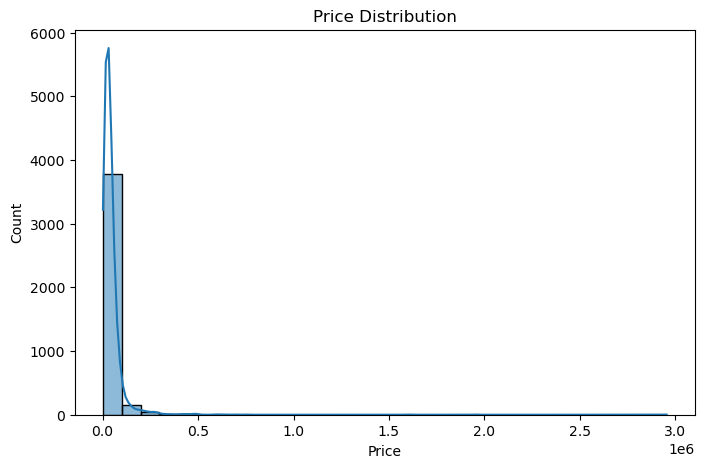

In [10]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

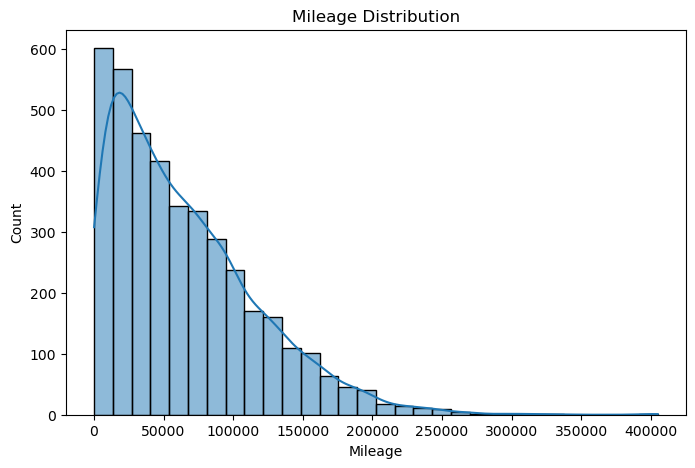

In [11]:
# Mileage Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['milage'], bins=30, kde=True)
plt.title("Mileage Distribution")
plt.xlabel("Mileage")
plt.show()

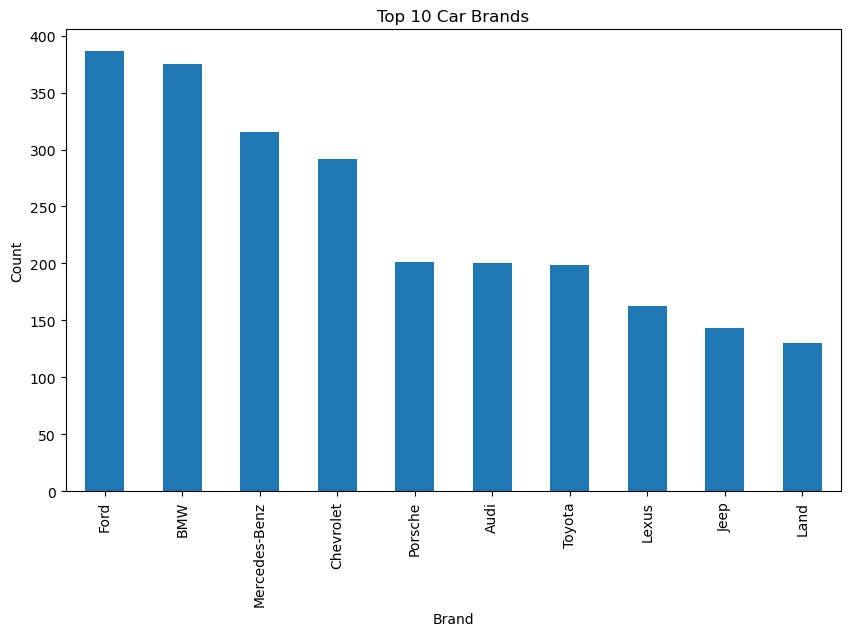

In [12]:
# Top 10 Car Brands
plt.figure(figsize=(10,6))
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Car Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

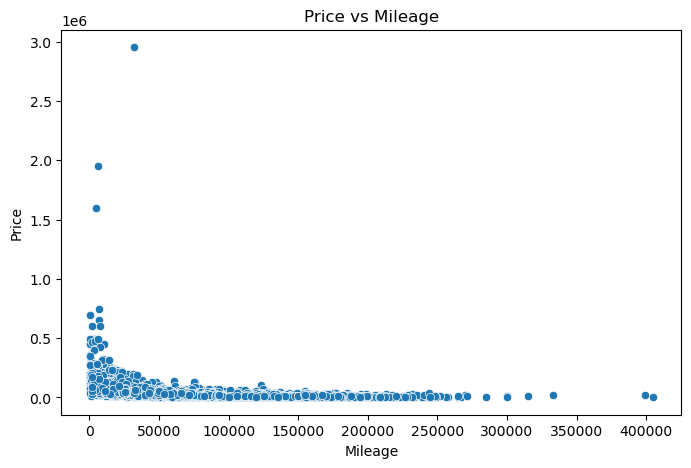

In [13]:
# Price vs Mileage
plt.figure(figsize=(8,5))
sns.scatterplot(x='milage', y='price', data=df)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

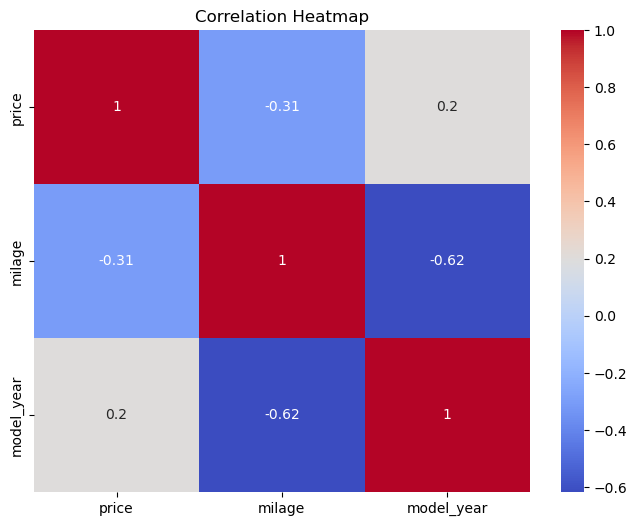

In [14]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# SAVE CLEAN DATA
df.to_csv("cleaned_used_cars.csv", index=False)                   

In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)   # 25th percentile
    Q3 = df[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'milage')

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['price', 'milage', 'model_year']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder={}
le = LabelEncoder()

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    encoder[col]=le

In [20]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [21]:
X = df.drop('price', axis=1)
y = df['price']

In [22]:
corr = df.corr()['price'].sort_values(ascending=False)
print(corr)

price           1.000000
model_year      0.584310
engine          0.522284
accident        0.232489
int_col         0.059808
model           0.035170
brand           0.008111
transmission   -0.005020
fuel_type      -0.010423
ext_col        -0.034931
milage         -0.651379
clean_title          NaN
Name: price, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []

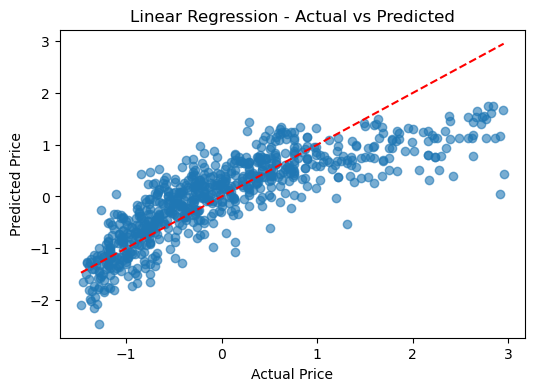

In [26]:
#1.Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

results.append({
    'Model': 'Linear Regression',
    'R2': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
})

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()

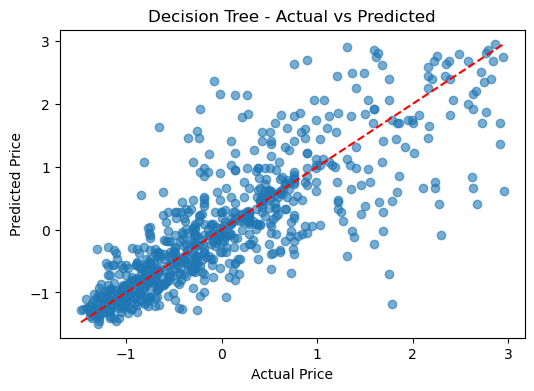

In [27]:
# 2.Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

results.append({
    'Model': 'Decision Tree',
    'R2': r2_score(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt))
})

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree - Actual vs Predicted')
plt.show()

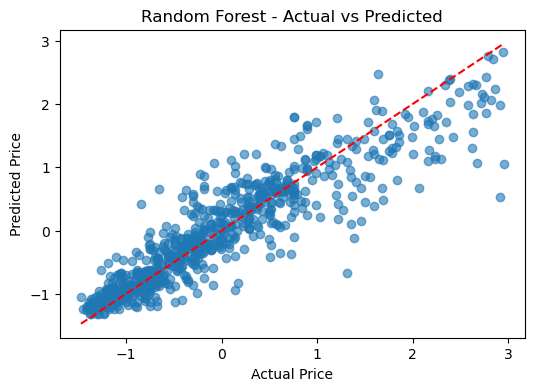

In [28]:
# 3️. Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

results.append({
    'Model': 'Random Forest',
    'R2': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
})

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest - Actual vs Predicted')
plt.show()

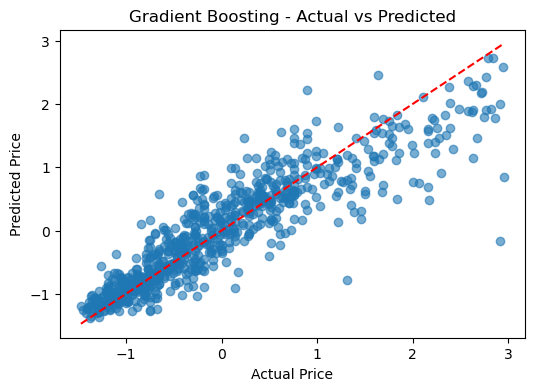

In [30]:
#4️. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

results.append({
    'Model': 'Gradient Boosting',
    'R2': r2_score(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb))
})

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting - Actual vs Predicted')
plt.show()

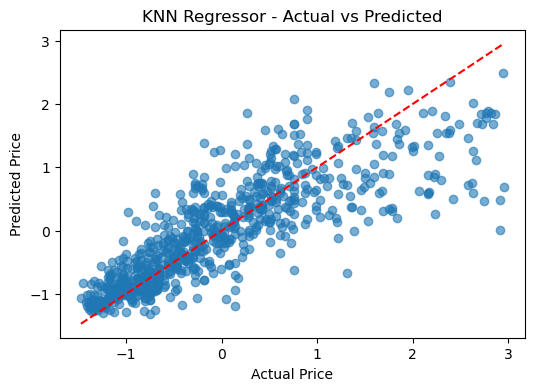

In [31]:
#5️. KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

results.append({
    'Model': 'KNN Regressor',
    'R2': r2_score(y_test, y_pred_knn),
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn))
})

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor - Actual vs Predicted')
plt.show()

               Model        R2       MAE      RMSE
0  Linear Regression  0.674088  0.434058  0.574525
1      Decision Tree  0.636160  0.407019  0.607036
2      Random Forest  0.827620  0.290332  0.417833
3  Gradient Boosting  0.814956  0.301942  0.432908
4  Gradient Boosting  0.814956  0.301942  0.432908
5      KNN Regressor  0.684512  0.399851  0.565263


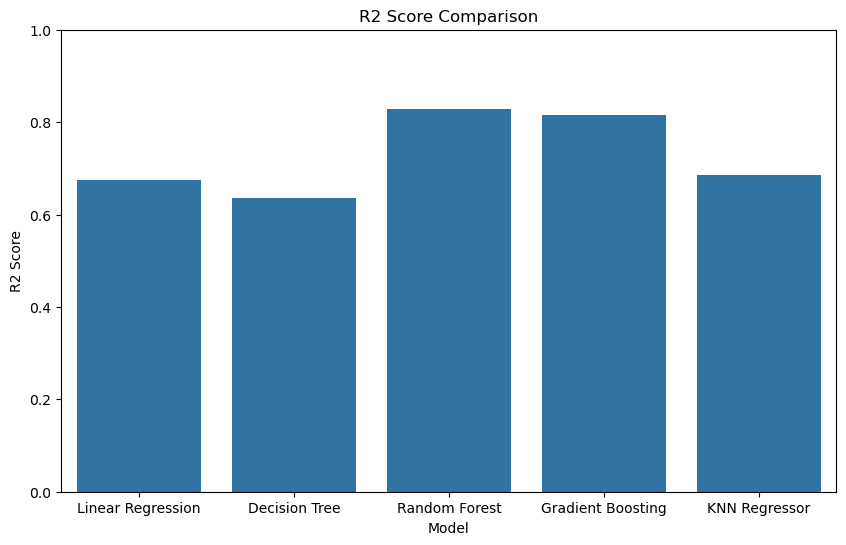

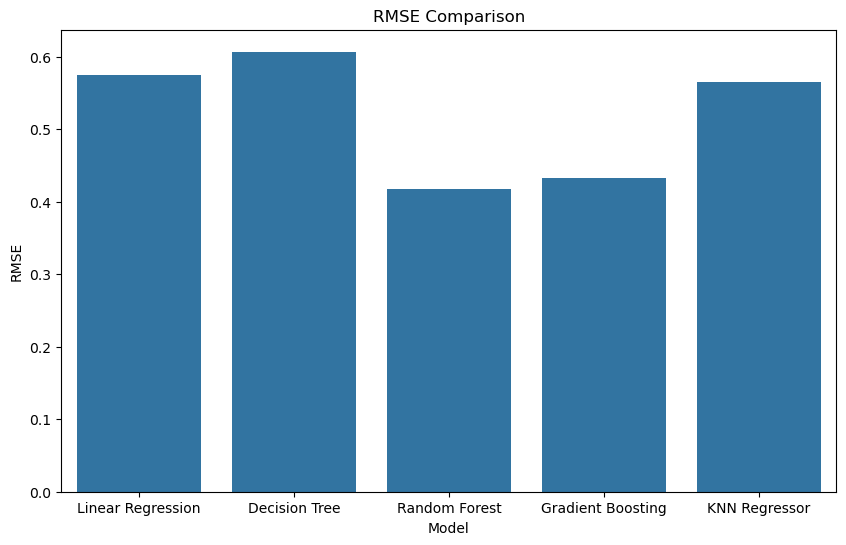

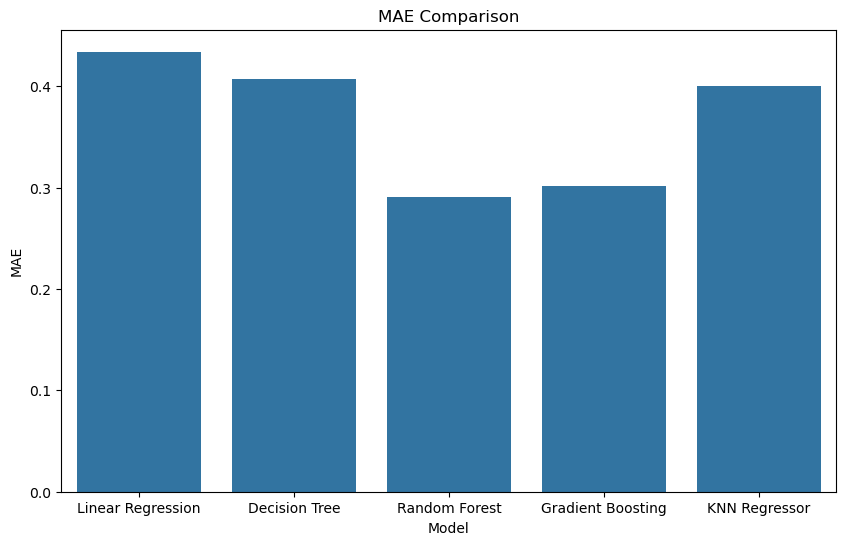

In [32]:
#Overall Comparison
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.show()

In [34]:
print(results_df[['Model', 'R2', 'MAE', 'RMSE']])

               Model        R2       MAE      RMSE
0  Linear Regression  0.674088  0.434058  0.574525
1      Decision Tree  0.636160  0.407019  0.607036
2      Random Forest  0.827620  0.290332  0.417833
3  Gradient Boosting  0.814956  0.301942  0.432908
4  Gradient Boosting  0.814956  0.301942  0.432908
5      KNN Regressor  0.684512  0.399851  0.565263


In [36]:
allowed_models = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'KNN Regressor'
]

# Filter results_df to only these models
filtered_df = results_df[results_df['Model'].isin(allowed_models)]

# Pick the one with highest R²
best_model = filtered_df.loc[filtered_df['R2'].idxmax()]

print("🏆 Best Performing Model (from allowed models):")
print(best_model)

🏆 Best Performing Model (from allowed models):
Model    Random Forest
R2             0.82762
MAE           0.290332
RMSE          0.417833
Name: 2, dtype: object


In [37]:
import joblib

# Save the already trained model
joblib.dump(rf, 'random_forest_car_price.pkl')

['random_forest_car_price.pkl']

In [38]:
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']

In [24]:
df.columns

Index(['model_year', 'milage', 'price', 'brand_1', 'brand_2', 'brand_3',
       'brand_4', 'brand_5', 'brand_6', 'brand_7',
       ...
       'int_col_122', 'int_col_123', 'int_col_124', 'int_col_125',
       'int_col_126', 'int_col_127', 'int_col_128', 'int_col_129',
       'int_col_130', 'accident_1'],
      dtype='object', length=3311)